# One Factor At the Time analysis

This notebook contains the code to do some OFAT analysis. For each parameter and output variable a plot will be created. 

In [1]:
# import some stuff
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading data

For each parameter there is a seperate file containing the data of varying that parameter while keeping the other parameters fixed at the default values. This function read the data belonging to a parameter and returns it as a Pandas dataframe.

In [2]:
def read_data(path):
    data = pd.read_csv(path)
    data['total'] = np.round(data['N'] // 2) + np.round((data['N'] // 2) * data['ratio']) + data['N'] - np.round(
        data['N'] // 2) - np.round(
        (data['N'] // 2) * data['ratio'])

    data['pfl_net'] = (data['pheromone'] - data['followers'] - data['leaders']) / data['total']
    data['pu_net'] = (data['pheromone'] - data['unassigned']) / data['total']
    data['flu_net'] = (data['followers'] + data['leaders'] - data['unassigned']) / data['total']

    return data

## Plotting functions

This function will create a scatter plot of a given parameter and output variable. In order to get a better sense of the trend, a line plot of the mean output value with the 95% confidence interval will be drawn in the same figure.

In [13]:
def plot_param_var(ax, df, param, var):
    x = df.groupby(param).mean().reset_index()[param]
    y = df.groupby(param).mean()[var]
    replicates = df.groupby(param)[var].count()
    err = (1.96 * df.groupby(param)[var].std()) / np.sqrt(replicates)
    ax.errorbar(x, y, yerr=err.as_matrix())

    ax.scatter(df[param], df[var])
    ax.set_xlabel(param)
    ax.set_ylabel(var)
    ax.set_ylim([-1.1, 1.1])

Another function creates one subfigure for each of the output variables for a parameter.

In [4]:
def plot_all_vars(df, param):
    f, axs = plt.subplots(3, figsize=(7, 10))
    plot_param_var(axs[0], df, param, 'pfl_net')
    plot_param_var(axs[1], df, param, 'pu_net')
    plot_param_var(axs[2], df, param, 'flu_net')

## Results

Parameter plots can now be created by changing the param variable in the following code block. The paramater names are listed below.

- 'p_uf' - The transition probability from unassigned to follower
- 'p_pu' - The transition probability from pheromoner to unassigned
- 'p_up' - The transition probability from unassigned to pheromoner
- 'p_fl' - The transition probability from follower to leader (success)
- 'p_lu' - The transition probability from leader (and its followers) to unassigned (failure)
- 'g' - Group size
- 'ratio' - Initial ratio leaders, pheromoners
- 'N' - Number of ants
- 'size' - Grid size

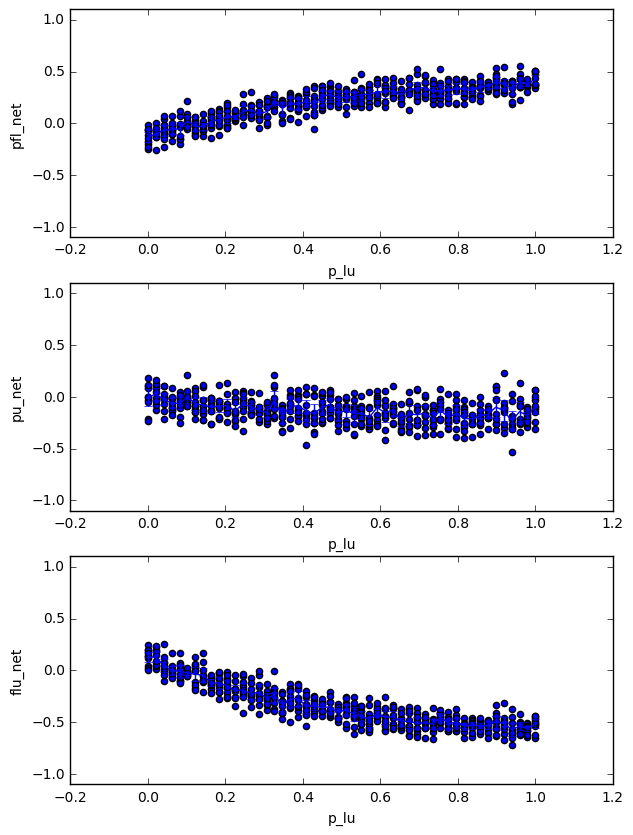

In [15]:
prefix = '../Data/ofat_full/ofat_2_2_2_'
param = 'p_lu'
data = read_data(prefix + param + '.csv')
plot_all_vars(data, param)
plt.show()